## Import Python libraries

In [33]:
# import basic libraries
import numpy as np
import pandas as pd
import os

In [34]:
# import libraries for modelling
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Load data

### Load and prepare original source data

In [36]:
# source data, the .csv files, should at the same directory as this notebook
!ls  

Visualizations.ipynb     knn.ipynb                textile-v1.0.0-1.csv
data_wrangling.ipynb     lgb_bayesian_draft.ipynb textile-v1.0.0-2.csv
emission-sample-data     linear_reg.ipynb         textile-v1.0.0-3.csv
emission-sample-data-OLD pdata                    textile-v1.0.0-4.csv
environment.yml          testing.ipynb            textile-v1.0.0-5.csv


In [41]:
# TO LOAD FROM NON WRANGLED SOURCE DATA
# read and concatenate the source data from the csv files to a pandas dataframe
data_path = "."
content = sorted(filter(lambda x: x.endswith(".csv"), os.listdir(data_path)))

df = pd.concat((pd.read_csv(f) for f in content))

In [43]:
df

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,...,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
0,b111,womenswear,uniform,jacket,NaN,blue gray,K,NaN,NaN,NaN,...,NaN,NaN,NaN,W,NaN,TR,NaN,XS,NaN,1.062
1,b82,home,home,curtain,NaN,teal,W,NaN,11.0,5.0,...,NaN,NaN,68.0,NaN,NaN,PK,NaN,XXL,NaN,NaN
2,b107,menswear,headgear,knit-cap,NaN,metal,K,3.0,NaN,4.0,...,89.0,2.0,NaN,M,NaN,PK,NaN,XL,NaN,0.160
3,b111,home,home,curtain,NaN,light grey,K,NaN,NaN,23.0,...,1.0,5.0,NaN,NaN,NaN,TR,NaN,M,NaN,NaN
4,b83,womenswear,footwear,socks,NaN,bondi blue,K,21.0,NaN,NaN,...,NaN,NaN,11.0,W,NaN,VN,NaN,M,NaN,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,b90,womenswear,nightwear,pyjama,NaN,pink,K,NaN,9.0,NaN,...,NaN,NaN,NaN,W,NaN,CN,NaN,L,NaN,NaN
2999996,b133,baby,footwear,socks,NaN,wheat,K,NaN,NaN,NaN,...,NaN,1.0,3.0,NaN,NaN,TW,NaN,XL,NaN,NaN
2999997,b1,menswear,outerwear,pants,NaN,gold,W,5.0,7.0,NaN,...,NaN,NaN,4.0,M,NaN,US,NaN,S,NaN,NaN
2999998,b73,menswear,accessory,backpack,NaN,amber,K,14.0,10.0,13.0,...,NaN,10.0,NaN,M,NaN,BD,NaN,XL,NaN,NaN


In [44]:
# drop rows with no values in the co2_total field
df = df[~df["co2_total"].isna()]

# Change empty values to zero
values ={'ftp_acrylic': 0, 'ftp_cotton': 0, 'ftp_elastane': 0, 'ftp_linen': 0, 'ftp_other': 0,
         'ftp_polyamide': 0, 'ftp_polyester': 0, 'ftp_silk': 0, 'ftp_viscose': 0, 'ftp_wool': 0}
df = df.fillna(value=values)

# change object column types to category type
cat_cols = ["category-1", "category-2", "category-3", "size", "made_in", "gender", "colour",  "brand", "fabric_type", "season"]
df[cat_cols] = df[cat_cols].astype("category")

In [45]:
# Look at data
df

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,...,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
23,b101,womenswear,headgear,flat-cap,4.90,light brown,K,0.0,12.0,6.0,...,61.0,0.0,0.0,W,NaN,TR,NaN,S,NaN,0.122
34,b131,clothing,accessory,backpack,26.92,unbleached,K,0.0,9.0,6.0,...,0.0,0.0,69.0,W,NaN,CN,NaN,M,NaN,NaN
51,b76,baby,thermals,trousers,34.06,purple,K,0.0,0.0,10.0,...,69.0,0.0,6.0,NaN,NaN,US,AYR,M,NaN,NaN
56,b86,menswear,swimwear,swimsuit,3.92,natural,K,0.0,0.0,0.0,...,0.0,0.0,0.0,M,NaN,HK,NaN,XS,NaN,NaN
74,b131,kidswear,thermals,trousers,38.77,green,K,8.0,2.0,14.0,...,3.0,6.0,0.0,B,NaN,ES,MID,XXL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999961,b66,clothing,home,sheets,8.17,turquoise,W,2.0,0.0,0.0,...,0.0,2.0,0.0,G,NaN,CN,NaN,XS,NaN,NaN
2999970,b131,clothing,clothing,jeans,9.70,blue gray,K,0.0,0.0,10.0,...,6.0,0.0,59.0,Y,NaN,CN,NaN,L,NaN,NaN
2999980,b125,baby,footwear,socks,1.75,unbleached,K,0.0,0.0,20.0,...,0.0,9.0,39.0,NaN,NaN,PK,NaN,M,NaN,NaN
2999981,b103,kidswear,footwear,socks,1.16,mustard,K,2.0,0.0,0.0,...,5.0,0.0,4.0,B,NaN,TR,NaN,L,NaN,NaN


In [46]:
# Look at data statistics
df.describe()

,co2_total,ftp_acrylic,ftp_cotton,ftp_elastane,ftp_linen,ftp_other,ftp_polyamide,ftp_polyester,ftp_polypropylene,ftp_silk,ftp_viscose,ftp_wool,label,unspsc_code,weight
count,1.699515e+06,1.699515e+06,1.699515e+06,1.699515e+06,1.699515e+06,1.699515e+06,1.699515e+06,1.699515e+06,787976.000000,1.699515e+06,1.699515e+06,1.699515e+06,0.0,0.0,680256.000000
mean,1.847729e+01,3.365711e+00,1.185529e+01,3.375940e+00,1.498079e+01,3.367124e+00,1.498462e+01,1.494221e+01,7.264267,1.201401e+01,3.369532e+00,1.184076e+01,NaN,NaN,0.521632
std,2.756457e+01,5.695436e+00,2.391280e+01,5.713437e+00,2.629642e+01,5.690012e+00,2.628059e+01,2.624786e+01,6.470794,2.402832e+01,5.702503e+00,2.390036e+01,NaN,NaN,0.698388
min,9.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.006000
25%,2.320000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.085000
50%,8.170000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.264000
75%,2.433000e+01,5.000000e+00,8.000000e+00,5.000000e+00,1.200000e+01,5.000000e+00,1.200000e+01,1.200000e+01,10.000000,9.000000e+00,5.000000e+00,8.000000e+00,NaN,NaN,0.736000
max,6.616600e+02,6.900000e+01,1.000000e+02,6.900000e+01,1.000000e+02,6.900000e+01,1.000000e+02,1.000000e+02,69.000000,1.000000e+02,6.900000e+01,1.000000e+02,NaN,NaN,7.925000


In [47]:
# check column types of the dataframe (Should be float64 and category only, although only weight and ftp_xxx used by regression models)
df.dtypes

brand                category
category-1           category
category-2           category
category-3           category
co2_total             float64
colour               category
fabric_type          category
ftp_acrylic           float64
ftp_cotton            float64
ftp_elastane          float64
ftp_linen             float64
ftp_other             float64
ftp_polyamide         float64
ftp_polyester         float64
ftp_polypropylene     float64
ftp_silk              float64
ftp_viscose           float64
ftp_wool              float64
gender               category
label                 float64
made_in              category
season               category
size                 category
unspsc_code           float64
weight                float64
dtype: object

In [52]:
# Dataframe with weight and co2_total only
df_wc = df[['category-1', 'category-2', 'category-3', 'weight', 'co2_total']]

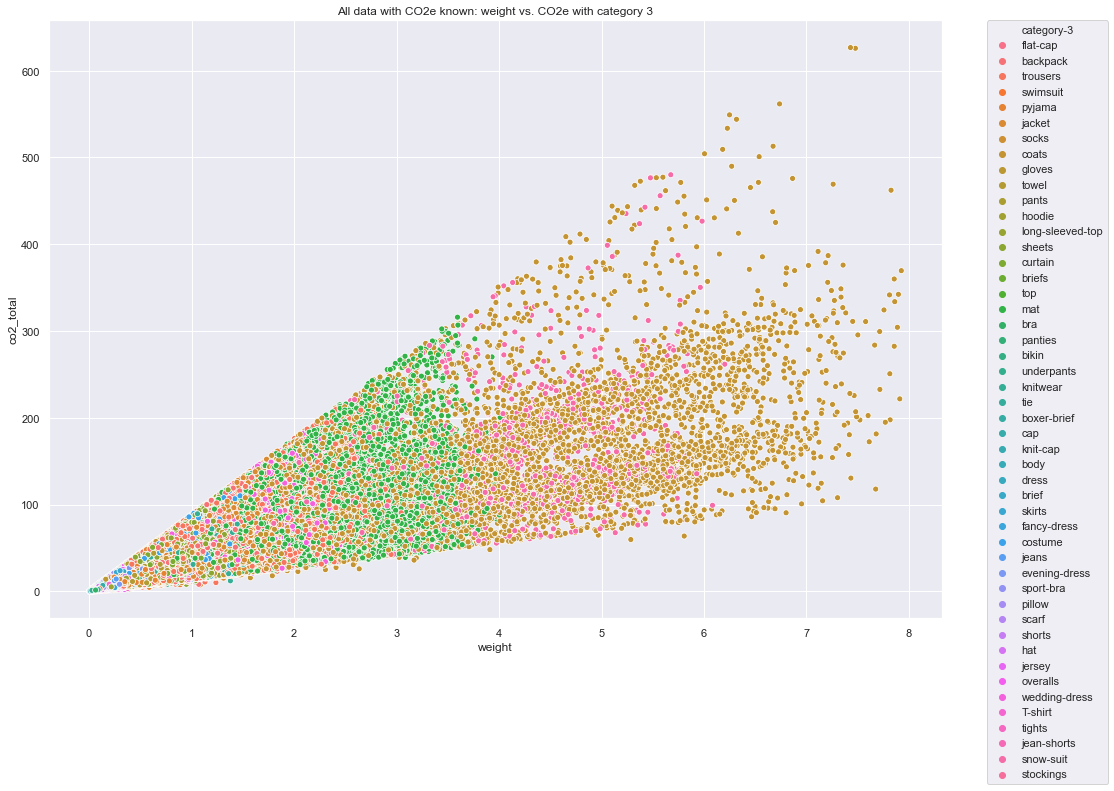

In [53]:
# Plot weight vs. co2_total with data poits colored by category-x
weight_co2_cat3 = sns.scatterplot(x="weight", y="co2_total", hue="category-3", data=df_wc)
weight_co2_cat3.set_title('All data with CO2e known: weight vs. CO2e with category 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = weight_co2_cat3.get_figure()
fig.set_size_inches(16, 11)

## Building ML/Regression models

### Prepare data for modelling

In [58]:
# copy dataframe to a new dataframe X
X = df.copy()

# Keep only numeric feature data
tokeep = ['ftp_acrylic', 'ftp_cotton', 'ftp_elastane', 'ftp_linen', 'ftp_other', 'ftp_polyamide', 'ftp_polyester', 'ftp_silk', 'ftp_viscose', 'ftp_wool', 'weight', 'co2_total']
X = X[tokeep]

# drop rows without weight values and co2_total column
X = X[~X["weight"].isna()]

# Extract co2_total (label) values to own vector
y = X["co2_total"].copy()

# Drop label values from X
X = X.drop(['co2_total'], axis=1)

X.head()

,ftp_acrylic,ftp_cotton,ftp_elastane,ftp_linen,ftp_other,ftp_polyamide,ftp_polyester,ftp_silk,ftp_viscose,ftp_wool,weight
23,0.0,12.0,6.0,1.0,6.0,3.0,7.0,61.0,0.0,0.0,0.122
84,0.0,4.0,0.0,0.0,4.0,9.0,73.0,0.0,0.0,0.0,0.276
91,0.0,45.0,14.0,3.0,7.0,4.0,13.0,6.0,3.0,0.0,0.679
92,0.0,9.0,0.0,8.0,0.0,9.0,18.0,16.0,3.0,33.0,0.808
133,23.0,9.0,0.0,31.0,0.0,7.0,0.0,0.0,0.0,0.0,0.033


### Split data to training and testing data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

### Initialize and train models with 1 Feature (weight) and all features and make predictions

#### Train a model with only one feature, weight

In [62]:
model_lr_w = LinearRegression(fit_intercept=True)
model_lr_w.fit(X_train['weight'][:,np.newaxis], y_train)

/Users/jyrkimartti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression()

##### Make predictions

In [65]:
y_fit_w = model_lr_w.predict(X_test['weight'][:, np.newaxis])

/Users/jyrkimartti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


#### Train model with all features (numerical)

In [63]:
model_lr_a = LinearRegression(fit_intercept=True)
model_lr_a.fit(X_train, y_train)

LinearRegression()

##### Make predictions

In [69]:
y_fit_a = model_lr_a.predict(X_test)

### Compare models

In [75]:
print("With only weight feature")
print("MSE: ", mean_squared_error(y_test, y_fit_w))
print("RMSE: ", mean_squared_error(y_test, y_fit_w, squared=False))
print("R2: ", r2_score(y_test, y_fit_w))
print()
print("With all numerical features")
print("MSE:", mean_squared_error(y_test, y_fit_a))
print("RMSE:", mean_squared_error(y_test, y_fit_a, squared=False))
print("R2:", r2_score(y_test, y_fit_a))

With only weight feature
MSE:  150.12516589737686
RMSE:  12.252557524752817
R2:  0.8049772136571565

With all numerical features
MSE: 117.01117205174563
RMSE: 10.817170242339058
R2: 0.8479945406197081


#### Visualize predicted co2_values vs. weight on source data (model trained with weight feature only)

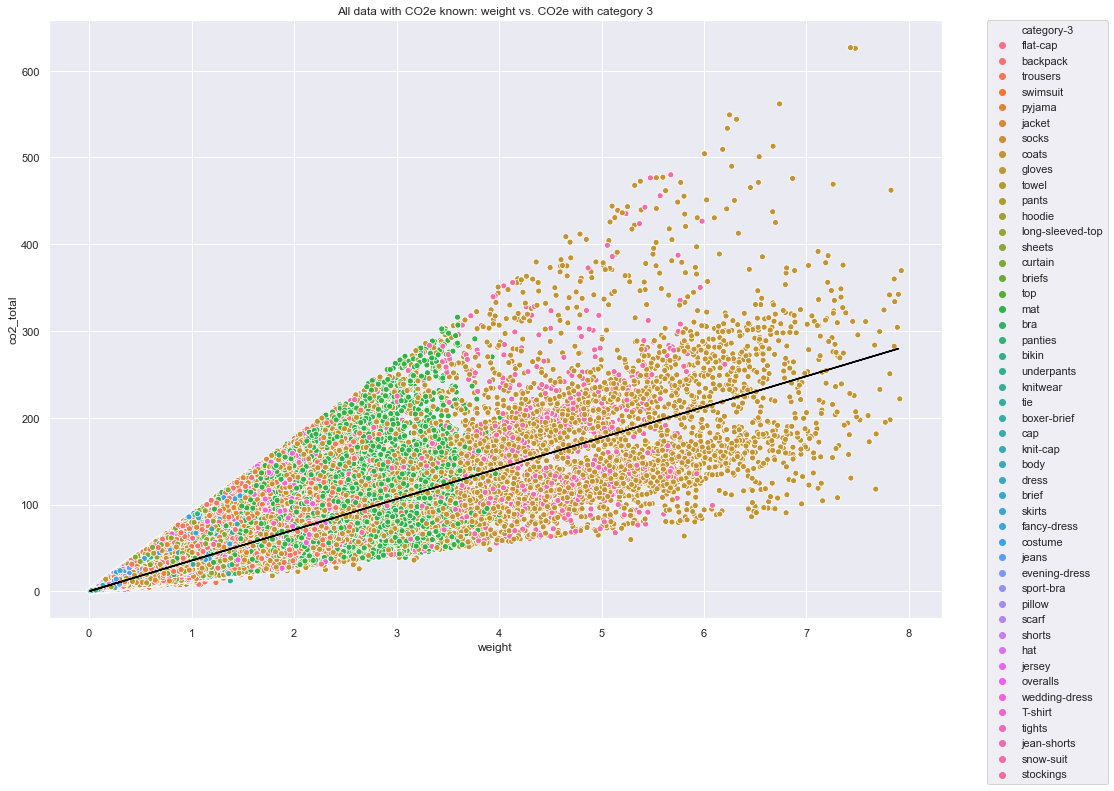

In [74]:
# Plot weight vs. co2_total with data poits colored by category-x
weight_co2_cat3 = sns.scatterplot(x="weight", y="co2_total", hue="category-3", data=df_wc)
weight_co2_cat3.set_title('All data with CO2e known: weight vs. CO2e with category 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# draw the fitted line
plt.plot(X_test['weight'], y_fit_w, color="black")

fig = weight_co2_cat3.get_figure()
fig.set_size_inches(16, 11)

***
***